* Предобработка
* Данные не обрезаны
* Представление - tf-idf
* Очень плохой баланс данных

 Алгоритмы :
* MultinomialNB
* ComplementNB
* LogisticRegression

# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Загрузка и предобработка данных

In [2]:
# загрузка
df = pd.read_csv('r_dataisbeautiful_posts.csv')

# отображение
df.head()

D:\conda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,hbyv2e,[OC] How Bar Chart Race Animation Can be Creat...,1,Tom10AE,NaN,NaN,0.0,[],1592565317,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
1,hbynoy,[UK] Labour and Conservative vote share by age...,1,Ge0rgeBr0ughton,NaN,NaN,0.0,[],1592564316,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
2,hbym2y,[NOC] Number of wallets returned across the wo...,1,i_am_shattered,NaN,NaN,0.0,[],1592564089,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
3,hbyirw,Largest Banana Producing Countries (1961-2020)...,1,Bilal078692,NaN,moderator,0.0,[],1592563628,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
4,hby1fy,[OC] Popular Combinations for the StamiStudios...,1,shahinrostami,Viz Researcher,NaN,0.0,[],1592561119,https://www.reddit.com/r/dataisbeautiful/comme...,2,False


In [3]:
# кол-во данных в датасете
len(df)

183891

## Визуальная оценка данных

Удалим признаки, которые не являются информативными, так как они будут просто забирать вычислительную мощность

* Признак id - простой идентификатор, можно удалить
* Признак full_link - ссылка, можно удалить

In [4]:
# удаление неинформативных признаков
df = df.drop(['id', 'full_link'], axis = 1)

df.head()

,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,num_comments,over_18
0,[OC] How Bar Chart Race Animation Can be Creat...,1,Tom10AE,NaN,NaN,0.0,[],1592565317,0,False
1,[UK] Labour and Conservative vote share by age...,1,Ge0rgeBr0ughton,NaN,NaN,0.0,[],1592564316,1,False
2,[NOC] Number of wallets returned across the wo...,1,i_am_shattered,NaN,NaN,0.0,[],1592564089,1,False
3,Largest Banana Producing Countries (1961-2020)...,1,Bilal078692,NaN,moderator,0.0,[],1592563628,0,False
4,[OC] Popular Combinations for the StamiStudios...,1,shahinrostami,Viz Researcher,NaN,0.0,[],1592561119,2,False


Сгруппируем по автору, посмотрим, информативен ли этот признак

In [5]:
df['author'].value_counts()

[deleted]           28596
jimrosenz            2293
OverflowDs            484
RAGTIMEMA             325
rhiever               323
                    ...  
Cmoney3386              1
PM_pick_up_lines        1
Brown_Frog              1
samelol114              1
borealis7               1
Name: author, Length: 78897, dtype: int64

Видно, что автор не уникален для каждого элемента выборки, значит может быть зависимость от автора, удалять нельзя

Сгруппируем по времени создания, посмотрим, информативен ли этот признак

In [6]:
df['created_utc'].value_counts()

1549716050    3
1491076058    3
1515692332    2
1408037037    2
1491085055    2
             ..
1453707717    1
1575748309    1
1485585106    1
1585238735    1
1397679695    1
Name: created_utc, Length: 183782, dtype: int64

In [7]:
df['created_utc'].value_counts().to_numpy()[107] 

1

In [8]:
len(df['created_utc'].value_counts().to_numpy())

183782

Можно предположить, что время создания - не особо информативный признак, так как очень мало элементов выборки имеют общее время создания (c 107 значения становится уникальным, а всего 183782 значений), попробуем удалить этот признак

In [9]:
df = df.drop(['created_utc'], axis = 1)

df.head()

,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,num_comments,over_18
0,[OC] How Bar Chart Race Animation Can be Creat...,1,Tom10AE,NaN,NaN,0.0,[],0,False
1,[UK] Labour and Conservative vote share by age...,1,Ge0rgeBr0ughton,NaN,NaN,0.0,[],1,False
2,[NOC] Number of wallets returned across the wo...,1,i_am_shattered,NaN,NaN,0.0,[],1,False
3,Largest Banana Producing Countries (1961-2020)...,1,Bilal078692,NaN,moderator,0.0,[],0,False
4,[OC] Popular Combinations for the StamiStudios...,1,shahinrostami,Viz Researcher,NaN,0.0,[],2,False


## Исследуем датасет на наличие пропусков и почистим данные от них

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183891 entries, 0 to 183890
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   title                  183890 non-null  object 
 1   score                  183891 non-null  int64  
 2   author                 183891 non-null  object 
 3   author_flair_text      24574 non-null   object 
 4   removed_by             11564 non-null   object 
 5   total_awards_received  44007 non-null   float64
 6   awarders               33332 non-null   object 
 7   num_comments           183891 non-null  int64  
 8   over_18                183891 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 11.4+ MB


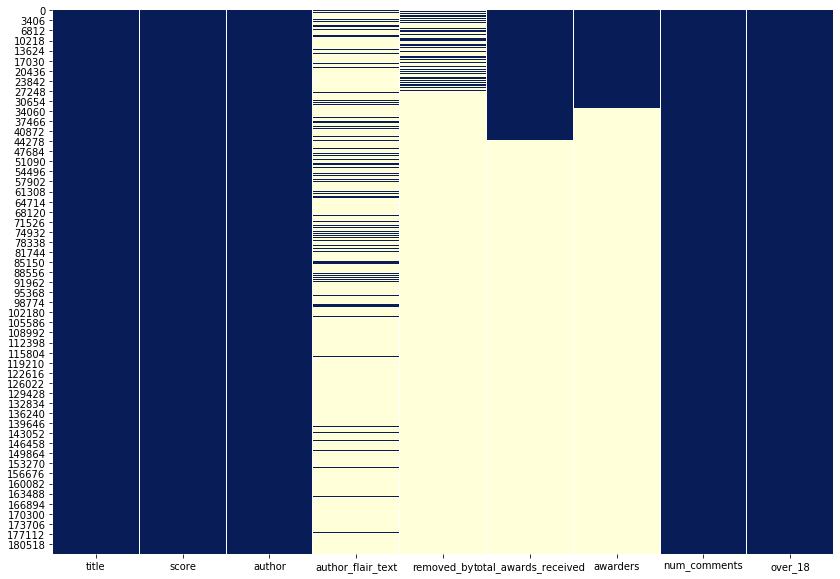

In [11]:
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

Признаки author_flair_text, removed_by практически полностью пустые, удалим их

Насчёт признаков awarders и total_awards_received ещё можно подумать, вдруг они несут полезгую информацию, однако тогда придётся очень сильно обрезать датасет (примерно до 33000 значений), что примерно 1/6 всех данных, это не очень хорошо

In [12]:
df = df.drop(['author_flair_text', 'removed_by'], axis = 1)

df.head()

,title,score,author,total_awards_received,awarders,num_comments,over_18
0,[OC] How Bar Chart Race Animation Can be Creat...,1,Tom10AE,0.0,[],0,False
1,[UK] Labour and Conservative vote share by age...,1,Ge0rgeBr0ughton,0.0,[],1,False
2,[NOC] Number of wallets returned across the wo...,1,i_am_shattered,0.0,[],1,False
3,Largest Banana Producing Countries (1961-2020)...,1,Bilal078692,0.0,[],0,False
4,[OC] Popular Combinations for the StamiStudios...,1,shahinrostami,0.0,[],2,False


Проанализируем признаки total_awards_received и awarders

In [13]:
df['total_awards_received'].value_counts()

0.0     43941
1.0        38
2.0         8
3.0         7
6.0         4
8.0         3
5.0         2
4.0         2
7.0         1
12.0        1
Name: total_awards_received, dtype: int64

Из 44007 заполненных значений 43941 имеют 0 наград, соответсвенно, можно сдлеать вывод о неинформативности признака, удалим его 

In [14]:
df = df.drop(['total_awards_received'], axis = 1)

df.head()

,title,score,author,awarders,num_comments,over_18
0,[OC] How Bar Chart Race Animation Can be Creat...,1,Tom10AE,[],0,False
1,[UK] Labour and Conservative vote share by age...,1,Ge0rgeBr0ughton,[],1,False
2,[NOC] Number of wallets returned across the wo...,1,i_am_shattered,[],1,False
3,Largest Banana Producing Countries (1961-2020)...,1,Bilal078692,[],0,False
4,[OC] Popular Combinations for the StamiStudios...,1,shahinrostami,[],2,False


In [15]:
df['awarders'].value_counts()

[]                     33331
['stompstumpstamp']        1
Name: awarders, dtype: int64

Оказалось, что awarders полностью незаполненный признак, удаляем смело

In [16]:
df = df.drop(['awarders'], axis = 1)

df.head()

,title,score,author,num_comments,over_18
0,[OC] How Bar Chart Race Animation Can be Creat...,1,Tom10AE,0,False
1,[UK] Labour and Conservative vote share by age...,1,Ge0rgeBr0ughton,1,False
2,[NOC] Number of wallets returned across the wo...,1,i_am_shattered,1,False
3,Largest Banana Producing Countries (1961-2020)...,1,Bilal078692,0,False
4,[OC] Popular Combinations for the StamiStudios...,1,shahinrostami,2,False


Вернемся к колонке автора, я заметил, что самый топовый автор - удалённый, это только засорит наши данные, поэтому очистим данные от удалённых авторов, придётся удалить 28596 данных,что учитвая, что всего 183891, я думаю, ничего страшного не произойдёт

In [17]:
df = df.drop(np.where(df['author'] == '[deleted]')[0])

df.head()

,title,score,author,num_comments,over_18
0,[OC] How Bar Chart Race Animation Can be Creat...,1,Tom10AE,0,False
1,[UK] Labour and Conservative vote share by age...,1,Ge0rgeBr0ughton,1,False
2,[NOC] Number of wallets returned across the wo...,1,i_am_shattered,1,False
3,Largest Banana Producing Countries (1961-2020)...,1,Bilal078692,0,False
4,[OC] Popular Combinations for the StamiStudios...,1,shahinrostami,2,False


In [18]:
len(df)

155295

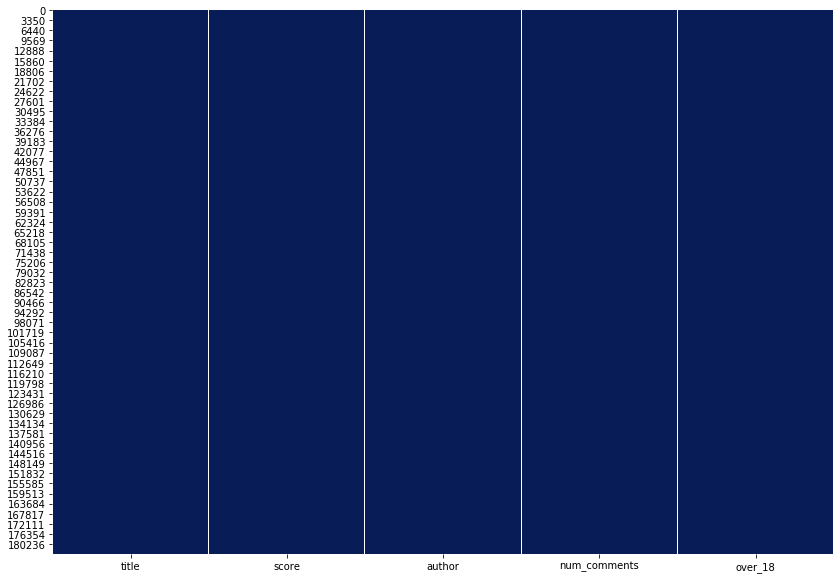

In [19]:
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155295 entries, 0 to 183890
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         155294 non-null  object
 1   score         155295 non-null  int64 
 2   author        155295 non-null  object
 3   num_comments  155295 non-null  int64 
 4   over_18       155295 non-null  bool  
dtypes: bool(1), int64(2), object(2)
memory usage: 6.1+ MB


null значения всё ещё остались, дропнем их

In [21]:
df = df.dropna()
len(df)

155294

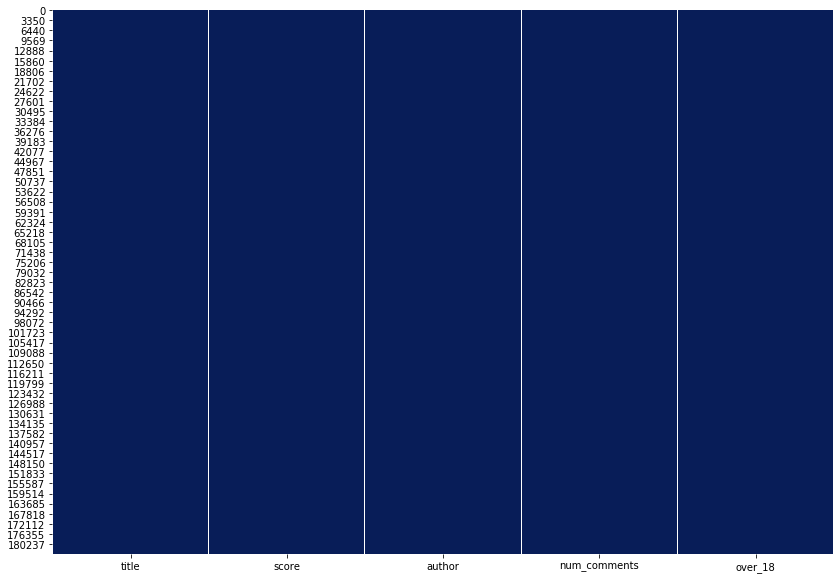

In [22]:
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

## Посмотрим основные статистики по количественным признакам

In [23]:
df.describe()

,score,num_comments
count,155294.000000,155294.000000
mean,217.336974,29.182744
std,2135.063730,211.168107
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,6.000000,5.000000
max,116226.000000,18801.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000001E2A4CDE88>,
      dtype=object)

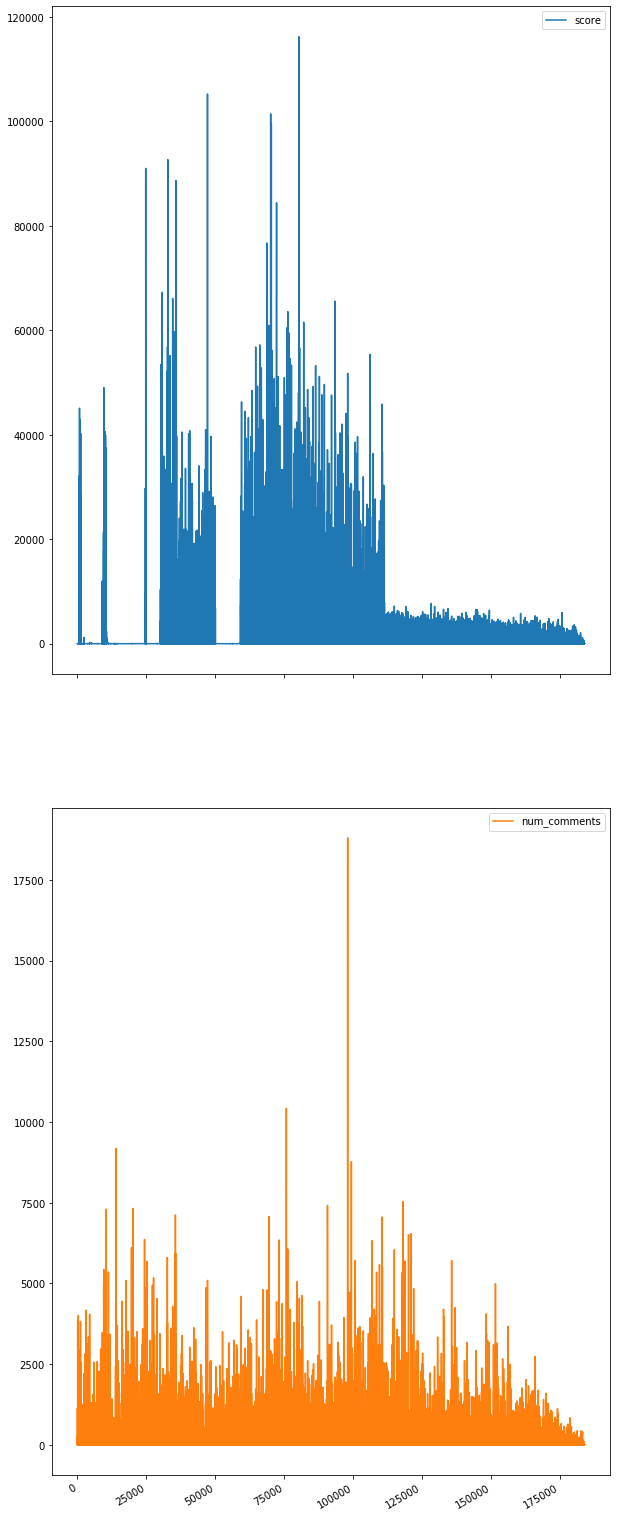

In [24]:
df.plot(subplots=True, figsize=(10, 30))

В данных есть выбросы, но после нормализации данных, вклад этих выбросов будет не таким большим

## Посмтрим на типы данных датасета, перекодируем категориальные признаки

In [25]:
df.dtypes

title           object
score            int64
author          object
num_comments     int64
over_18           bool
dtype: object

Есть категориальные признаки title и author, а так же булевский признак over_18

Колонку title будем кодировать с помощью TF-IDF, колонку author закодируем через LabelEncoder

over_18 перекодируем когда будем разделять выборку и ответы

In [26]:
# выделим title отдельно

title = df['title'].copy()
title

0         [OC] How Bar Chart Race Animation Can be Creat...
1         [UK] Labour and Conservative vote share by age...
2         [NOC] Number of wallets returned across the wo...
3         Largest Banana Producing Countries (1961-2020)...
4         [OC] Popular Combinations for the StamiStudios...
                                ...                        
183886             Infosthetics seems like it belongs here.
183887    Time lapse of every nuclear detonation from 19...
183888                                              Wavii. 
183889    An interactive representation of Pres. Obamas ...
183890    A map showing the geographical distribution of...
Name: title, Length: 155294, dtype: object

In [27]:
# дропнем title из датафрейма

df = df.drop(['title'], axis= 1)
df.head()

,score,author,num_comments,over_18
0,1,Tom10AE,0,False
1,1,Ge0rgeBr0ughton,1,False
2,1,i_am_shattered,1,False
3,1,Bilal078692,0,False
4,1,shahinrostami,2,False


In [28]:
# импортируем tfidf преобразование
from sklearn.feature_extraction.text import TfidfVectorizer

# стоп слова
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

# инициализировали алгоритм
vectorizer = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 2))

# преобразовали в матрицу tfidf 
title_tfidf = vectorizer.fit_transform(title.values)

# отобразим значения 

title_tfidf[0]

D:\conda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


<1x584365 sparse matrix of type '<class 'numpy.float64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [29]:
from sklearn import preprocessing

# функция кодировки 
def number_encode_features(init_df):
    result = init_df.copy() 
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder() 
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders


encoded_data, encoders = number_encode_features(df)
encoded_data.head()

,score,author,num_comments,over_18
0,1,28869,0,False
1,1,10977,1,False
2,1,49806,1,False
3,1,4004,0,False
4,1,68766,2,False


## Проверим балансировку целевой величины

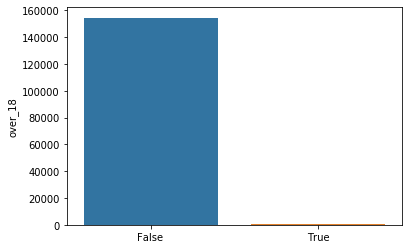

In [30]:
balance = df.groupby('over_18')['over_18'].count()

sns.barplot(x = [False, True], y = balance)

In [31]:
df.groupby('over_18')['over_18'].count()

over_18
False    154536
True        758
Name: over_18, dtype: int64

Данные очень несбалансированны, обрезать не вариант, так как ничего не останется, можно попробовать настроить веса некоторых алгоритмов

## Посмотрим на гистрограммы распределений

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000001E458519C8>,
      dtype=object)

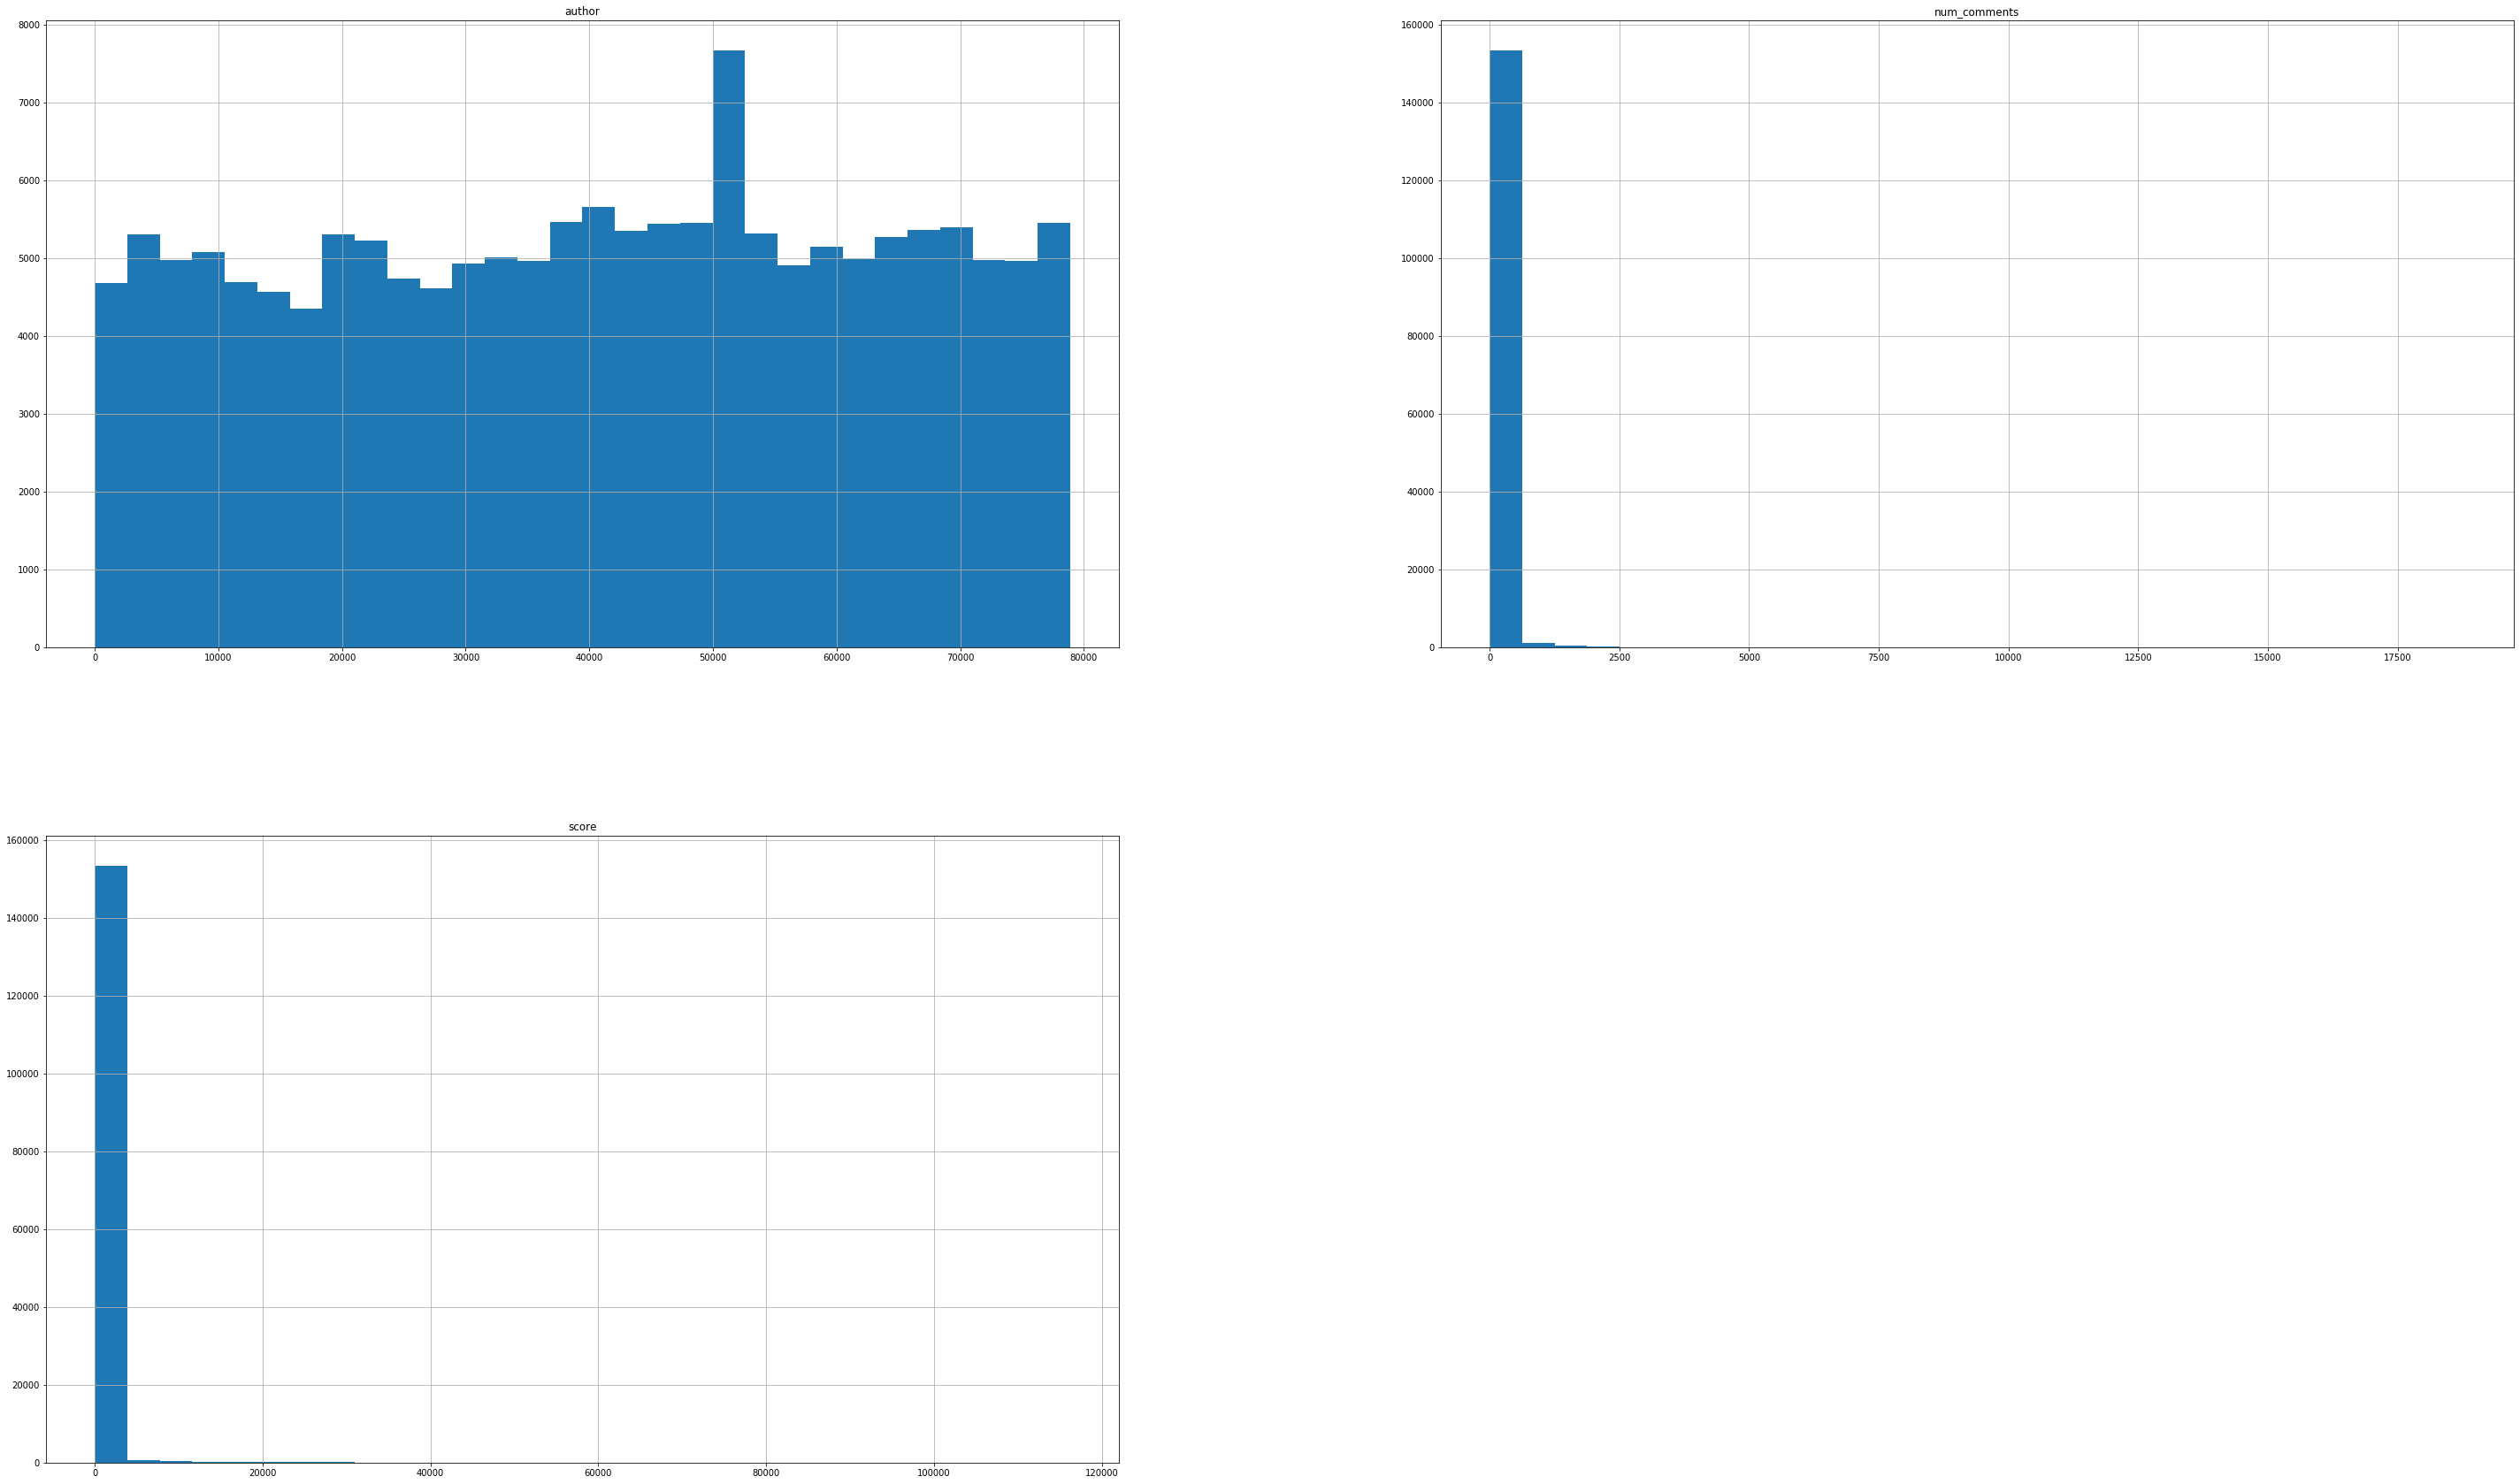

In [32]:
%matplotlib inline
encoded_data.hist(['score','author','num_comments'],bins=30,figsize=(50,30))

## Построим матрицу корреляций

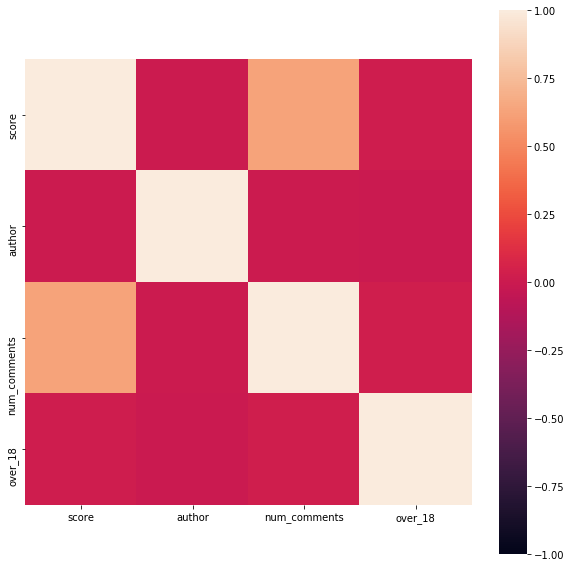

In [33]:
plt.subplots(figsize=(10,10))
sns.heatmap(encoded_data.corr(), vmin=-1, square=True)
plt.show()

# Подготовка данных к обучению

Самая важная информация должна храниться в признаке title.

К сожалению, не получается объединить выбранные мной признаки author, score, num_comments с tf-idf представлением title, так как требуется около 60 гб оперативной памяти для преобразования разряженной матрицы scipy в np.array и соеднинения выборки.

Представленный выше pipeline обработки можно использовать с другим представлением признака title, либо на очень мощном ПК или сервисе.

В дальнейшнем я для обучения и прогнозов я буду использовать только признак title, c подозрением на то, что в нём хранится больше всего полезной инофрмации.

'Забываем' про предобработанный датафрем df, работаем только с признаком title_tfidf 

В таком случае можно будет оставить некоторые удалённые из-за null значений данные

## Предобработка new

In [34]:
# загрузка
df_new = pd.read_csv('r_dataisbeautiful_posts.csv')

# отображение
df_new.head()

D:\conda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,hbyv2e,[OC] How Bar Chart Race Animation Can be Creat...,1,Tom10AE,NaN,NaN,0.0,[],1592565317,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
1,hbynoy,[UK] Labour and Conservative vote share by age...,1,Ge0rgeBr0ughton,NaN,NaN,0.0,[],1592564316,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
2,hbym2y,[NOC] Number of wallets returned across the wo...,1,i_am_shattered,NaN,NaN,0.0,[],1592564089,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
3,hbyirw,Largest Banana Producing Countries (1961-2020)...,1,Bilal078692,NaN,moderator,0.0,[],1592563628,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
4,hby1fy,[OC] Popular Combinations for the StamiStudios...,1,shahinrostami,Viz Researcher,NaN,0.0,[],1592561119,https://www.reddit.com/r/dataisbeautiful/comme...,2,False


In [35]:
# очистка от всех признаков кроме title

df_new = df_new.drop(['id', 'score','author','author_flair_text','removed_by','total_awards_received',
             'awarders','created_utc','full_link','num_comments'], axis = 1)
df_new.head()

,title,over_18
0,[OC] How Bar Chart Race Animation Can be Creat...,False
1,[UK] Labour and Conservative vote share by age...,False
2,[NOC] Number of wallets returned across the wo...,False
3,Largest Banana Producing Countries (1961-2020)...,False
4,[OC] Popular Combinations for the StamiStudios...,False


In [36]:
# кол-во записей

len(df_new)

183891

In [37]:
# очистка от null значений

df_new = df_new.dropna()

df_new.head()

,title,over_18
0,[OC] How Bar Chart Race Animation Can be Creat...,False
1,[UK] Labour and Conservative vote share by age...,False
2,[NOC] Number of wallets returned across the wo...,False
3,Largest Banana Producing Countries (1961-2020)...,False
4,[OC] Popular Combinations for the StamiStudios...,False


In [38]:
# кол-во записей после очистки

len(df_new)

183890

## Ещё раз посмотрим на балансировку

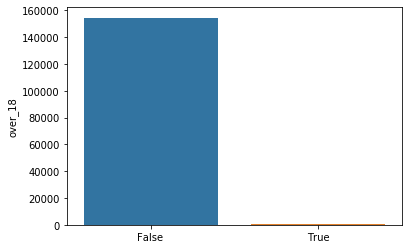

In [39]:
balance = df_new.groupby('over_18')['over_18'].count()

sns.barplot(x = [False, True], y = balance)

## Представим title через tf-idf

In [40]:
title_new = df_new['title'].copy()
title_new

0         [OC] How Bar Chart Race Animation Can be Creat...
1         [UK] Labour and Conservative vote share by age...
2         [NOC] Number of wallets returned across the wo...
3         Largest Banana Producing Countries (1961-2020)...
4         [OC] Popular Combinations for the StamiStudios...
                                ...                        
183886             Infosthetics seems like it belongs here.
183887    Time lapse of every nuclear detonation from 19...
183888                                              Wavii. 
183889    An interactive representation of Pres. Obamas ...
183890    A map showing the geographical distribution of...
Name: title, Length: 183890, dtype: object

In [41]:
# импортируем tfidf преобразование
from sklearn.feature_extraction.text import TfidfVectorizer

# стоп слова
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

# инициализировали алгоритм
vectorizer = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 2))

# преобразовали в матрицу tfidf 
title_tfidf = vectorizer.fit_transform(title_new.values)

# отобразим значения 

title_tfidf[0]

<1x647524 sparse matrix of type '<class 'numpy.float64'>'
	with 25 stored elements in Compressed Sparse Row format>

## Выделим целевую переменную

In [42]:
y = np.array([1 if i == True else 0 for i in df_new['over_18']]) # ответы
y

array([0, 0, 0, ..., 0, 0, 0])

## Сделаем train-test split

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(title_tfidf,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)

# Обучение алгоритмов

Как правило, лучше всего с тектсовыми данными из классических алгоритмов справляется Наивный Баес и его модификации. Начнём с него.

Для тюнинга алгоритмов используем кросс-валидацию на тобучающей выборке

In [44]:
# Функция отрисовки графиков
def grid_plot(x, y, x_label, title, y_label='f1'):
    # определили размер графика
    plt.figure(figsize=(12, 6))
    # добавили сетку на фон
    plt.grid(True)
    # построили по х - число соседей, по y - точность
    plt.plot(x, y, 'go-')
    # добавили подписи осей и название графика
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

## Naive Bayes classifiers

### Multinomial Naive Bayes

In [45]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV

alg = MultinomialNB()

grid = {'alpha': np.array(np.linspace(0, 6, 30), dtype='float'),
        }

gs = GridSearchCV(alg, grid, verbose=2, n_jobs = -1,scoring='f1')
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   40.3s finished
D:\conda\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


({'alpha': 0.0}, 0.11205366494712721)

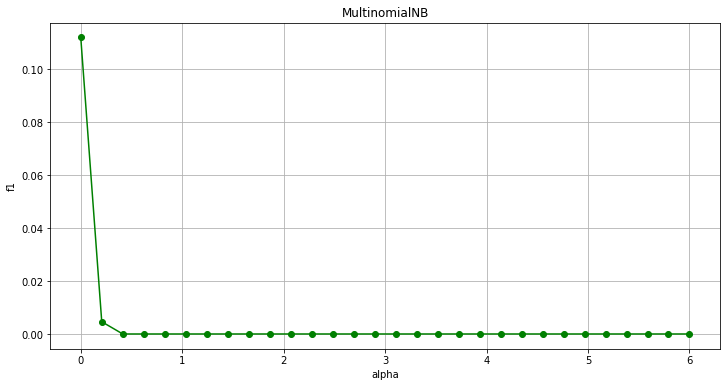

In [46]:
grid_plot(grid['alpha'], gs.cv_results_['mean_test_score'], 'alpha', 'MultinomialNB')

In [47]:
from sklearn.metrics import classification_report

clf = MultinomialNB(0)
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

print(classification_report(y_test, preds))

D:\conda\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     36583
           1       0.10      0.31      0.15       195

    accuracy                           0.98     36778
   macro avg       0.55      0.65      0.57     36778
weighted avg       0.99      0.98      0.99     36778



[[36032   551]
 [  134    61]]


Text(0.5, 42.0, 'Predicted value')

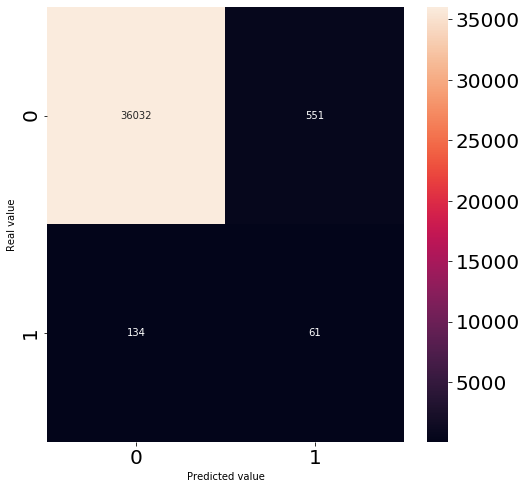

In [48]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib

fig = plt.figure(figsize=(8,8))
nn_mtx = confusion_matrix(y_test, preds)
print(nn_mtx)
font = {'weight' : 'bold', 'size'   :22}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.heatmap(nn_mtx, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

Алгоритм очень плохо отличает один класс, так же в приницпе плохо его обнаруживает, так как данные очень несбалансированны. Много ошибок второго рода. 

Имеет смысл попробовать ComplementNB, так как он лучше работает с несбалансированными данными

### Complement Naive Bayes

In [49]:
from sklearn.naive_bayes import ComplementNB

alg = ComplementNB()

grid = {'alpha': np.array(np.linspace(0, 6, 30), dtype='float'),
        }

gs = GridSearchCV(alg, grid, verbose=2, n_jobs = -1,scoring='f1')
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   38.1s finished
D:\conda\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


({'alpha': 0.0}, 0.06796618512832436)

In [50]:
clf = ComplementNB(0)
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

print(classification_report(y_test, preds))

D:\conda\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     36583
           1       0.05      0.40      0.09       195

    accuracy                           0.96     36778
   macro avg       0.52      0.68      0.53     36778
weighted avg       0.99      0.96      0.97     36778



[[35091  1492]
 [  117    78]]


Text(0.5, 42.0, 'Predicted value')

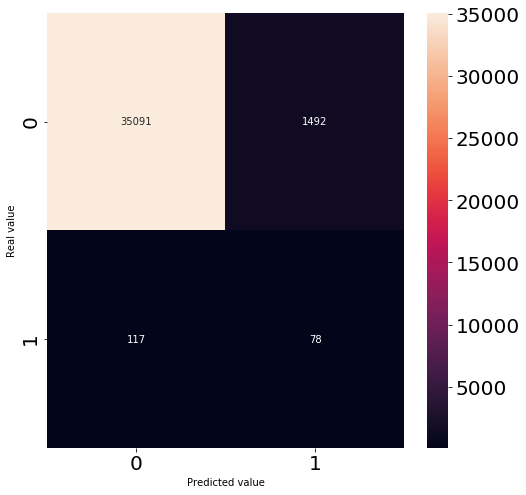

In [51]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib

fig = plt.figure(figsize=(8,8))
nn_mtx = confusion_matrix(y_test, preds)
print(nn_mtx)
font = {'weight' : 'bold', 'size'   :22}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.heatmap(nn_mtx, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

Данные очень несблансированны, Complement Naive Bayes стал ещё хуже отличать один из классов, хотя он лучше работает с несбалансированными данными. Ещё больше ошибок второго рода. 

Однако ошибок первого рода стало меньше, recall больше, то есть этот алгоритм лучше обнаруживает класс 1

Тут нужно решить, что ценнее, по мне, лучше совершать меньше ошибок первого рода, лучше находить 18+ тэг

В этом случае алгоритм Complement Naive Bayes справился лучше


## Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

alg = LogisticRegression(class_weight='balanced')

grid = {'penalty': ['l1', 'l2', 'elasticnet'],
        'C': np.array(np.logspace(-3, 2, num = 10), dtype='float'),
        }

gs = GridSearchCV(alg, grid, verbose=2, n_jobs = -1,scoring='f1')
gs.fit(X_train, y_train)

print(gs.best_params_, gs.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  6.1min finished


{'C': 2.1544346900318843, 'penalty': 'l2'} 0.36578677214551075


D:\conda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [53]:
clf = LogisticRegression(C= 2.1544346900318843,penalty='l2', class_weight='balanced')
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     36583
           1       0.32      0.48      0.38       195

    accuracy                           0.99     36778
   macro avg       0.66      0.74      0.69     36778
weighted avg       0.99      0.99      0.99     36778



D:\conda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[36386   197]
 [  102    93]]


Text(0.5, 42.0, 'Predicted value')

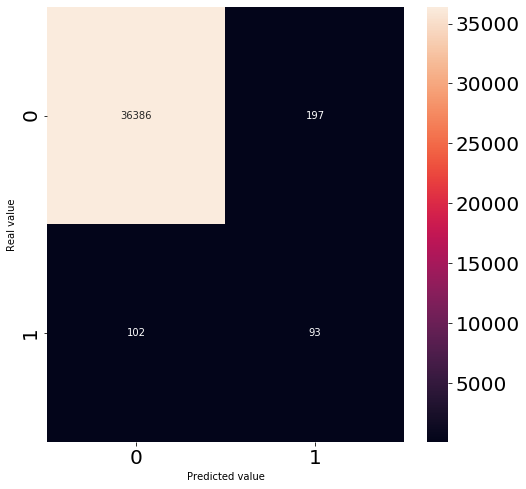

In [54]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib

fig = plt.figure(figsize=(8,8))
nn_mtx = confusion_matrix(y_test, preds)
print(nn_mtx)
font = {'weight' : 'bold', 'size'   :22}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.heatmap(nn_mtx, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

In [55]:
from sklearn.linear_model import LogisticRegression

alg = LogisticRegression()

grid = {'penalty': ['l1', 'l2', 'elasticnet'],
        'C': np.array(np.logspace(-3, 2, num = 10), dtype='float'),
        }

gs = GridSearchCV(alg, grid, verbose=2, n_jobs = -1,scoring='f1')
gs.fit(X_train, y_train)

print(gs.best_params_, gs.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  4.8min finished


{'C': 100.0, 'penalty': 'l2'} 0.3297176127678883


D:\conda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [56]:
clf = LogisticRegression(C=100,penalty='l2')
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36583
           1       0.63      0.28      0.38       195

    accuracy                           1.00     36778
   macro avg       0.81      0.64      0.69     36778
weighted avg       0.99      1.00      0.99     36778



D:\conda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[36551    32]
 [  141    54]]


Text(0.5, 42.0, 'Predicted value')

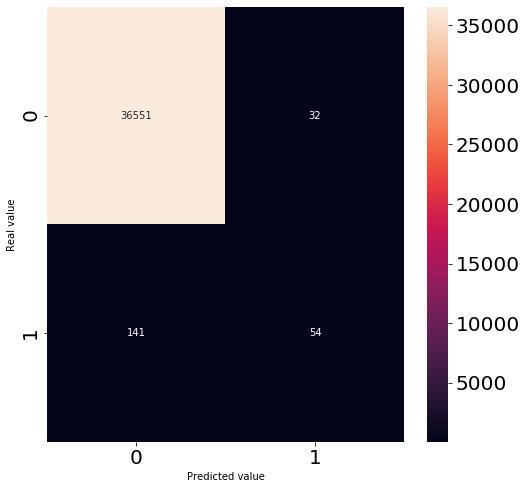

In [57]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib

fig = plt.figure(figsize=(8,8))
nn_mtx = confusion_matrix(y_test, preds)
print(nn_mtx)
font = {'weight' : 'bold', 'size'   :22}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.heatmap(nn_mtx, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

Я попробовал два типа логистической регрессии : со сбалансированными весами и с обычными. Если веса балансировать, то мы получаем ниже precision, но выше recall.

F1 метрика без балансировки стала выше

Я думаю, что лучше иметь выше reacall, чтобы в принципе лучше обнаружать класс 18+ тега. Мы совершаем меньше ошибок первого рода, но больше ошибок второго

В целом лог рег сработал сильно лучше по метрикам, чем алгоритмы Навиного Байеса

Так же можно отметить, что с балансировкой и с bag of words мы получаем recall выше,чем c tfidf.

Без балансировки и с bag of words мы получаем f1 выше, чем с tfidf

В этом случает bag of words даже превзошёл tfidf

# Небольшой вывод

Больше алгоритмов обучить не получилось с таким представлением текста и таким объемом данных, слишком долго обучаются, возможно даже все зависает (svm крутил часа 3, не обучился, gradient boosting и random forest по часу)
В других ноутбоках я попробую bag of words и обрезать датасет

Пока из исследованного лучше всего логрег